# Slide 71 and below

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = np.loadtxt('dataset5.txt')
X = data[:, 0:2]
y = data[:, 2:3]

In [3]:
inputs = keras.Input(shape=(2,))

In [4]:
x = layers.Dense(5, activation='sigmoid')(inputs)
outputs = layers.Dense(1, activation='sigmoid')(x)

2022-03-18 14:25:05.746188: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-18 14:25:05.747076: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-18 14:25:05.751824: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [6]:
opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.8, nesterov=True)

In [7]:
model.compile(optimizer=opt, loss="mean_squared_error", metrics=['accuracy'])

In [8]:
history = model.fit(X, y, epochs=200, verbose=0, validation_split=0.1)

2022-03-18 14:25:06.736222: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-18 14:25:06.755016: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [10]:
import matplotlib.pyplot as plt

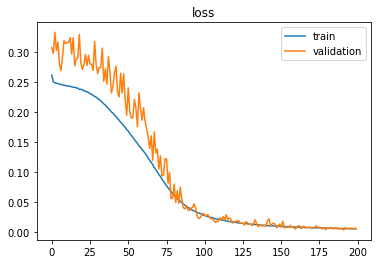

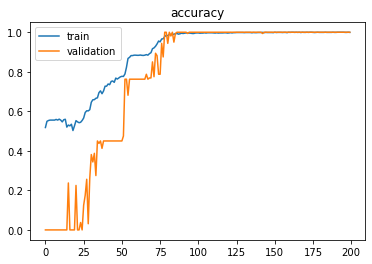

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure()
plt.plot(loss, label='train')
plt.plot(val_loss, label='validation')
plt.title('loss')
plt.legend()
plt.show(block=False)    
    
# plot accuracy
plt.figure()
plt.plot(accuracy, label='train')
plt.plot(val_accuracy, label='validation')
plt.title('accuracy')
plt.legend()
plt.show(block=False)

In [12]:
def plot_results(model, X, y):
    
    # w1 class: y==1
    # w2 class: y==0
    
    w1i = np.array(np.where(y == _class_w1))
    w2i = np.array(np.where(y == _class_w2))
    
    # plot samples

    plt.figure()
    plt.plot(X[w1i,0],X[w1i,1],'+r')
    plt.plot(X[w2i,0],X[w2i,1],'+b')
    plt.axis('equal')
    plt.title('samples and decision boundary')
    
    # plot the decision boundary
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    ZZ = model.predict(xy)
    
    # plot the boundary
    
    ax.contour(XX, YY, ZZ.reshape(XX.shape), colors='k', 
               levels=[_output_class_threshold], alpha=0.5, linestyles=['--'])
    plt.show(block=False) # to force visualization
    
    # plot the classification map
    
    plt.figure()
    plt.imshow(ZZ.reshape(XX.shape).T, origin='lower', 
               extent=(xlim[0], xlim[1], ylim[0], ylim[1]),
               cmap='coolwarm', vmin=0, vmax=1)
    plt.colorbar()
    plt.plot(X[w1i,0],X[w1i,1],'+k') # black
    plt.plot(X[w2i,0],X[w2i,1],'+w') # white
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
    plt.title('classification map')
    plt.show(block=False) # to force visualization

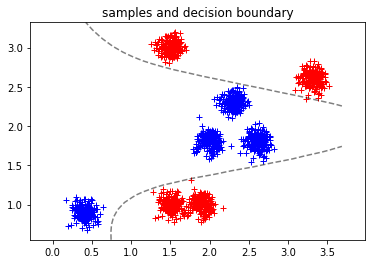

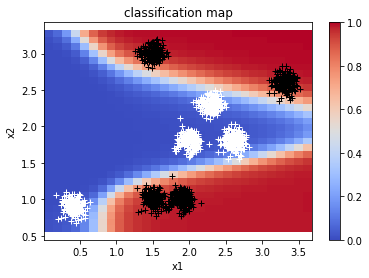

In [13]:
_class_w1 = 1
_class_w2 = 0

_output_class_threshold = 0.5

plot_results(model, X, y)

**End**